Dropped & Resampled (over + under)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
#import sklearn

In [3]:
data = pd.read_csv('cs-training.csv')
data.head(10)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
1,2,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
2,3,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0
8,9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2
9,10,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145838 entries, 0 to 145837
Data columns (total 12 columns):
ID                                      145838 non-null int64
SeriousDlqin2yrs                        145838 non-null int64
RevolvingUtilizationOfUnsecuredLines    145838 non-null float64
age                                     145838 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    145838 non-null int64
DebtRatio                               145838 non-null float64
MonthlyIncome                           120121 non-null float64
NumberOfOpenCreditLinesAndLoans         145838 non-null int64
NumberOfTimes90DaysLate                 145838 non-null int64
NumberRealEstateLoansOrLines            145838 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    145838 non-null int64
NumberOfDependents                      145838 non-null int64
dtypes: float64(3), int64(9)
memory usage: 13.4 MB


In [5]:
y = data['SeriousDlqin2yrs']
y.describe()

count    145838.000000
mean          0.066594
std           0.249319
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [6]:
X = data[:]

In [7]:
X.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
1,2,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
2,3,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0


In [8]:
X = X.drop('SeriousDlqin2yrs', axis=1)
X.head()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
1,2,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
2,3,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
3,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
4,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
X_train.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,131254.000000,131254.000000,131254.000000,131254.000000,131254.000000,1.081330e+05,131254.000000,131254.000000,131254.000000,131254.000000,131254.000000
mean,72804.313971,5.997810,52.133901,0.249272,333.783852,6.675534e+03,8.540319,0.091258,1.031725,0.065171,0.757897
std,42101.751072,254.949768,14.591806,0.703064,1992.170505,1.495568e+04,5.140298,0.487467,1.139350,0.331326,1.116716
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36328.250000,0.030904,41.000000,0.000000,0.172339,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,72749.500000,0.157490,52.000000,0.000000,0.358182,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,109236.750000,0.559142,62.000000,0.000000,0.767095,8.239000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,145838.000000,50708.000000,107.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


In [11]:
X_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    131254.000000
mean          5.997810
std         254.949768
min           0.000000
25%           0.030904
50%           0.157490
75%           0.559142
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

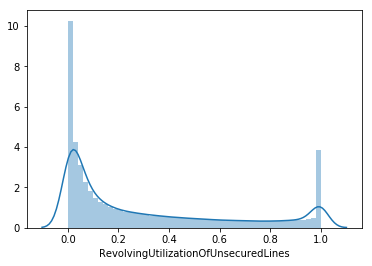

In [12]:
d1=X_train.loc[X_train['RevolvingUtilizationOfUnsecuredLines'] <=1]
sns.distplot(d1['RevolvingUtilizationOfUnsecuredLines'])

In [13]:
#X_train['RevolvingUtilizationOfUnsecuredLines'] = X_train['RevolvingUtilizationOfUnsecuredLines'].map(lambda x: np.NaN if x >1 else x)

# Ratio >1 -> 95% quantile
imp = X_train['RevolvingUtilizationOfUnsecuredLines'].quantile(q=0.95)
print(imp)
X_train.loc[X_train['RevolvingUtilizationOfUnsecuredLines']>1, 'RevolvingUtilizationOfUnsecuredLines']=imp

0.9999998999999999


/data/huangqi/anaconda3/envs/ba/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
X_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    131254.000000
mean          0.319948
std           0.348106
min           0.000000
25%           0.030904
50%           0.157490
75%           0.559142
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [15]:
#X_train['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill', inplace=True)
#X_train['RevolvingUtilizationOfUnsecuredLines'].describe()

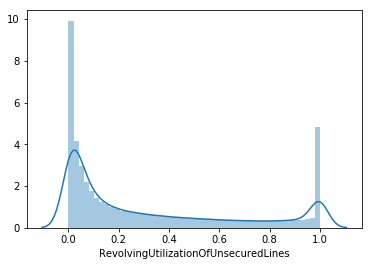

In [16]:
sns.distplot(X_train['RevolvingUtilizationOfUnsecuredLines'])

In [17]:
X_train['age'].describe()

count    131254.000000
mean         52.133901
std          14.591806
min           0.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         107.000000
Name: age, dtype: float64

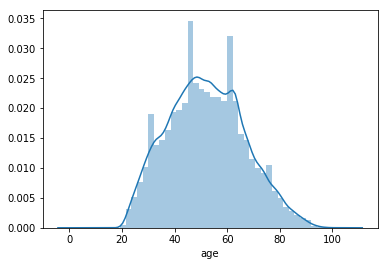

In [18]:
sns.distplot(X_train['age'])

29.0
77.0


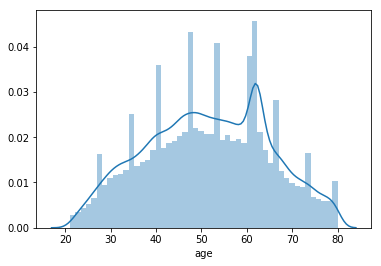

In [19]:
imp1 = X_train['age'].quantile(q=0.05)
imp2 = X_train['age'].quantile(q=0.95)
print(imp1)
print(imp2)
# 25% and 75%
X_train.loc[X_train['age']>80, 'age']=62
X_train.loc[X_train['age']<18, 'age']=41
sns.distplot(X_train['age'])

In [20]:
X_train['age'].describe()

count    131254.000000
mean         51.432261
std          13.486040
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max          80.000000
Name: age, dtype: float64

In [21]:
X_train['DebtRatio'].describe()

count    131254.000000
mean        333.783852
std        1992.170505
min           0.000000
25%           0.172339
50%           0.358182
75%           0.767095
max      329664.000000
Name: DebtRatio, dtype: float64

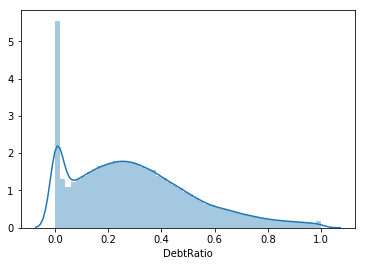

In [22]:
data2=X_train[X_train['DebtRatio']<=1]
sns.distplot(data2['DebtRatio'])

In [23]:
d2=X_train[X_train['DebtRatio']>1]
d2['DebtRatio'].describe()

count     28492.000000
mean       1536.544184
std        4054.072662
min           1.000500
25%          41.000000
50%         943.000000
75%        2256.000000
max      329664.000000
Name: DebtRatio, dtype: float64

In [24]:
#imp = X_train['DebtRatio'].quantile(q=0.75)
#print(imp)
#X_train.loc[X_train['DebtRatio']>1, 'DebtRatio']= imp

X_train.loc[X_train['DebtRatio']>1, 'DebtRatio']= np.NaN
X_train['DebtRatio'].fillna(method='ffill', inplace=True)
X_train['DebtRatio'].describe()

/data/huangqi/anaconda3/envs/ba/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


count    131254.000000
mean          0.303256
std           0.224816
min           0.000000
25%           0.127775
50%           0.275328
75%           0.437522
max           1.000000
Name: DebtRatio, dtype: float64

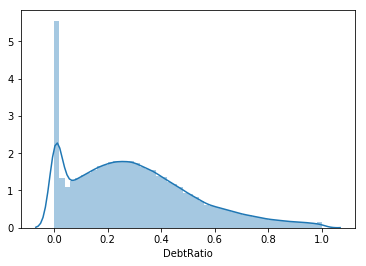

In [25]:
sns.distplot(X_train['DebtRatio'])

In [26]:
X_train['DebtRatio'].describe()

count    131254.000000
mean          0.303256
std           0.224816
min           0.000000
25%           0.127775
50%           0.275328
75%           0.437522
max           1.000000
Name: DebtRatio, dtype: float64

In [27]:
X_train['NumberOfOpenCreditLinesAndLoans'].describe()

count    131254.000000
mean          8.540319
std           5.140298
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

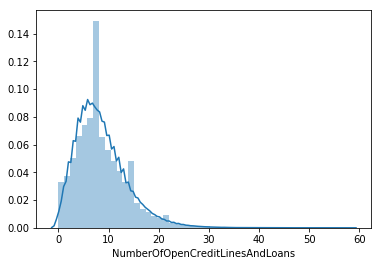

In [28]:
sns.distplot(X_train['NumberOfOpenCreditLinesAndLoans'])

In [29]:
imp = X_train['NumberOfOpenCreditLinesAndLoans'].quantile(q=0.95)
print(imp)
X_train.loc[X_train['NumberOfOpenCreditLinesAndLoans']>20, 'NumberOfOpenCreditLinesAndLoans']= imp
X_train['NumberOfOpenCreditLinesAndLoans'].describe()

18.0


count    131254.000000
mean          8.357901
std           4.598434
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          20.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

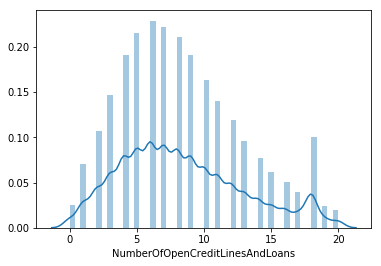

In [30]:
sns.distplot(X_train['NumberOfOpenCreditLinesAndLoans'])

In [31]:
X_train['MonthlyIncome'].describe()

count    1.081330e+05
mean     6.675534e+03
std      1.495568e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.239000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

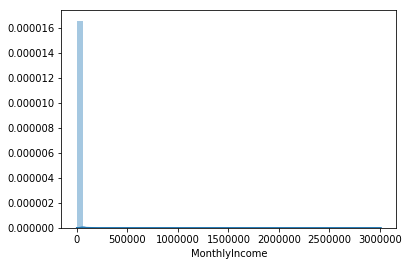

In [32]:
sns.distplot(X_train['MonthlyIncome'].dropna())

In [33]:
len(X_train[X_train['MonthlyIncome']<1000])

3951

In [34]:
imp = X_train['MonthlyIncome'].quantile(q=0.05)
print(imp)
X_train.loc[X_train['MonthlyIncome']<1000, 'MonthlyIncome']=imp
X_train['MonthlyIncome'].describe()

1300.0


count    1.081330e+05
mean     6.711250e+03
std      1.494146e+04
min      1.000000e+03
25%      3.400000e+03
50%      5.400000e+03
75%      8.239000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

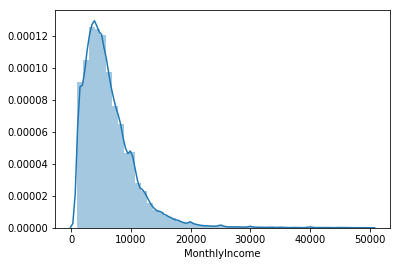

In [35]:
d2=X_train[X_train['MonthlyIncome']<50000]
sns.distplot(d2['MonthlyIncome'].dropna())

In [36]:
len(X_train[X_train['MonthlyIncome']>20000])

1866

In [37]:
imp = X_train['MonthlyIncome'].quantile(q=0.95)
print(imp)
X_train.loc[X_train['MonthlyIncome']>20000, 'MonthlyIncome']=imp
X_train['MonthlyIncome'].describe()

14583.0


count    108133.000000
mean       6222.927534
std        3784.351900
min        1000.000000
25%        3400.000000
50%        5400.000000
75%        8239.000000
max       20000.000000
Name: MonthlyIncome, dtype: float64

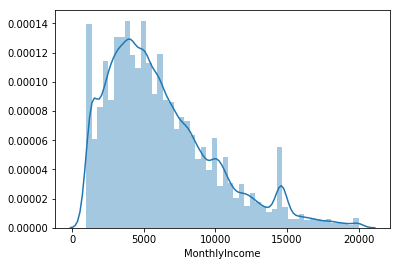

In [38]:
sns.distplot(X_train['MonthlyIncome'].dropna())


In [39]:
#X_train['MonthlyIncome'].fillna(method='ffill', inplace=True)

#X_train['MonthlyIncome'].describe()

In [40]:
#sns.distplot(X_train['MonthlyIncome'])

In [41]:
X_train['NumberRealEstateLoansOrLines'].describe()

count    131254.000000
mean          1.031725
std           1.139350
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

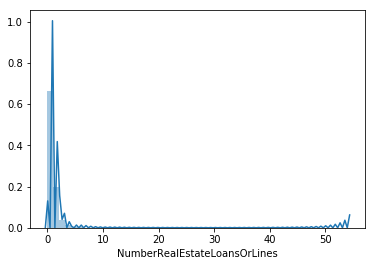

In [42]:
sns.distplot(X_train['NumberRealEstateLoansOrLines'])

In [43]:
imp = X_train['NumberRealEstateLoansOrLines'].quantile(q=0.95)
print(imp)

X_train.loc[X_train['NumberRealEstateLoansOrLines']>4, 'NumberRealEstateLoansOrLines']= imp
X_train['NumberRealEstateLoansOrLines'].describe()

3.0


count    131254.000000
mean          0.994933
std           0.962009
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

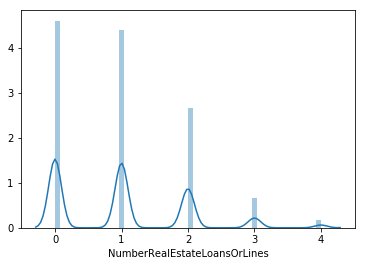

In [44]:
sns.distplot(X_train['NumberRealEstateLoansOrLines'])

In [45]:
X_train['NumberOfDependents'].describe()

count    131254.000000
mean          0.757897
std           1.116716
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

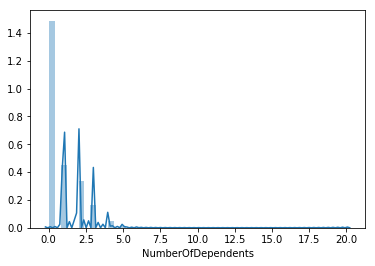

In [46]:
sns.distplot(X_train['NumberOfDependents'])

In [47]:
imp = X_train['NumberOfDependents'].quantile(q=0.95)
print(imp)
X_train.loc[X_train['NumberOfDependents']>5, 'NumberOfDependents']= imp

3.0


In [48]:
X_train['NumberOfDependents'].describe()

count    131254.000000
mean          0.751809
std           1.092797
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

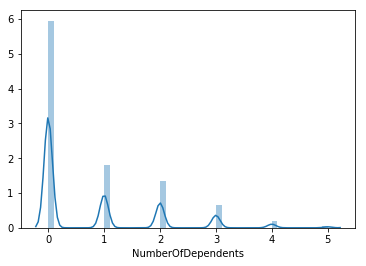

In [49]:
sns.distplot(X_train['NumberOfDependents'])

In [50]:
X_train.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,131254.000000,131254.000000,131254.000000,131254.000000,131254.000000,108133.000000,131254.000000,131254.000000,131254.000000,131254.000000,131254.000000
mean,72804.313971,0.319948,51.432261,0.249272,0.303256,6222.927534,8.357901,0.091258,0.994933,0.065171,0.751809
std,42101.751072,0.348106,13.486040,0.703064,0.224816,3784.351900,4.598434,0.487467,0.962009,0.331326,1.092797
min,2.000000,0.000000,21.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36328.250000,0.030904,41.000000,0.000000,0.127775,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,72749.500000,0.157490,52.000000,0.000000,0.275328,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,109236.750000,0.559142,62.000000,0.000000,0.437522,8239.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,145838.000000,1.000000,80.000000,13.000000,1.000000,20000.000000,20.000000,17.000000,4.000000,11.000000,5.000000


In [51]:
#from fancyimpute import KNN 
#fancy impute removes column names.
#train_cols = list(train)
# Use 5 nearest rows which have a feature to fill in each row's
# missing features
#X_train_filled_knn = KNN(k=5).complete(X_train)
#X_filled_knn = KNN(k=3).fit_transform(X_train)    


In [52]:
cleaned = pd.concat([X_train, y_train],axis = 1)
dr = cleaned.dropna(axis=0)
dr.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000
mean,72817.659327,0.328612,50.715887,0.261807,0.306156,6222.927534,8.571648,0.091424,1.017552,0.066899,0.844885,0.068897
std,42093.387216,0.346540,13.439208,0.720338,0.223203,3784.351900,4.591465,0.488182,0.969844,0.336445,1.123703,0.253279
min,2.000000,0.000000,21.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36463.000000,0.034860,41.000000,0.000000,0.132908,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72692.000000,0.175982,51.000000,0.000000,0.278150,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,109255.000000,0.575410,61.000000,0.000000,0.440140,8239.000000,11.000000,0.000000,2.000000,0.000000,2.000000,0.000000
max,145838.000000,1.000000,80.000000,13.000000,1.000000,20000.000000,20.000000,17.000000,4.000000,11.000000,5.000000,1.000000


In [53]:
y_train = dr['SeriousDlqin2yrs']
y_train.describe()

count    108133.000000
mean          0.068897
std           0.253279
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [54]:
X_train = dr.drop('SeriousDlqin2yrs', axis=1)
X_train.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000,108133.000000
mean,72817.659327,0.328612,50.715887,0.261807,0.306156,6222.927534,8.571648,0.091424,1.017552,0.066899,0.844885
std,42093.387216,0.346540,13.439208,0.720338,0.223203,3784.351900,4.591465,0.488182,0.969844,0.336445,1.123703
min,2.000000,0.000000,21.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36463.000000,0.034860,41.000000,0.000000,0.132908,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,72692.000000,0.175982,51.000000,0.000000,0.278150,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,109255.000000,0.575410,61.000000,0.000000,0.440140,8239.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,145838.000000,1.000000,80.000000,13.000000,1.000000,20000.000000,20.000000,17.000000,4.000000,11.000000,5.000000


In [55]:
X_train.to_csv('X_train 0512 dropped.csv')
y_train.to_csv('y_train 0512 dropped.csv')

/data/huangqi/anaconda3/envs/ba/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


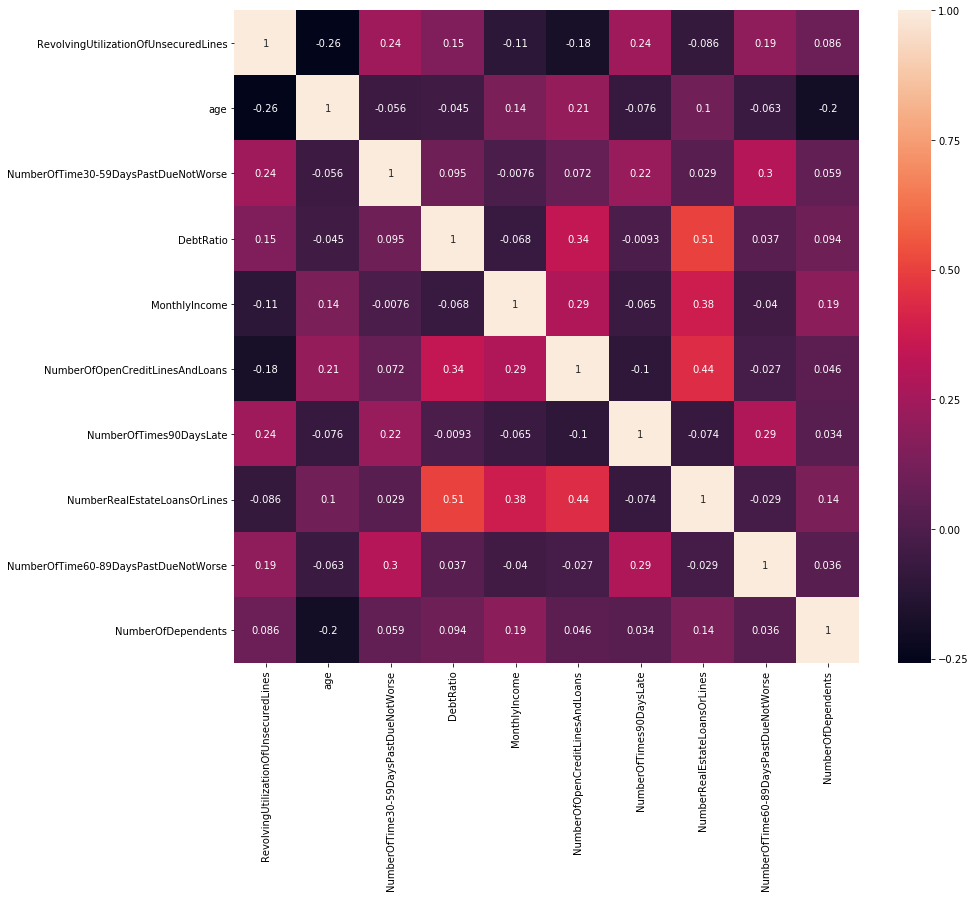

In [56]:
corr = X_train.drop('ID', axis=1).corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

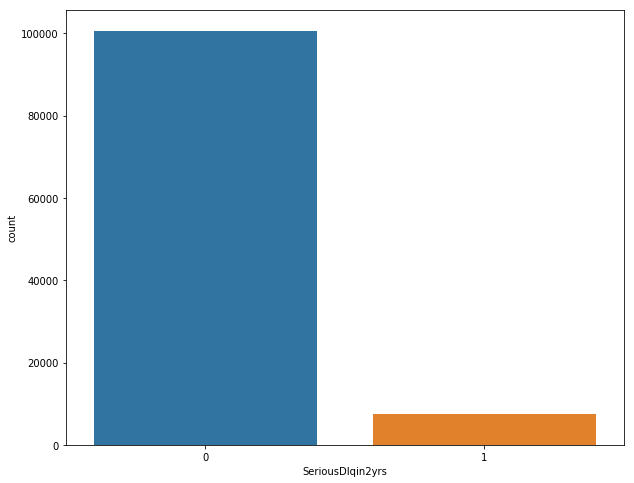

In [57]:
plt.figure(figsize=(10,8))
sns.countplot("SeriousDlqin2yrs", data=dr)

In [59]:
print(np.bincount(y_train))

[100683   7450]


In [63]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42,ratio=0.4)
X_smt, y_smt = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_smt))

Resampled dataset shape Counter({0: 100683, 1: 40273})


In [64]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_sample(
    X_smt, y_smt)
#print(X_train.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))

(80546, 11)
[40273 40273]


In [69]:
X_train_final = pd.DataFrame(X_train_subsample, columns = X_train.columns)
X_train_final.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,80546.000000,80546.000000,80546.000000,80546.000000,80546.000000,80546.000000,80546.000000,80546.000000,80546.000000,80546.000000,80546.000000
mean,73468.580766,0.485419,48.422180,0.597202,0.327159,5834.680643,8.360190,0.343523,0.987160,0.219061,0.942871
std,42059.676408,0.367300,12.341394,1.009448,0.217191,3623.525849,4.474587,0.858599,0.939425,0.558151,1.085359
min,2.000000,0.000000,21.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37528.066977,0.105925,39.125290,0.000000,0.161003,3146.282399,5.000000,0.000000,0.000000,0.000000,0.000000
50%,73461.000000,0.469496,48.000000,0.000000,0.302353,5000.000000,8.000000,0.000000,1.000000,0.000000,0.723017
75%,110002.230630,0.860148,57.000000,1.000000,0.463053,7650.000000,11.000000,0.149295,1.808010,0.000000,1.802598
max,145833.000000,1.000000,80.000000,13.000000,1.000000,20000.000000,20.000000,17.000000,4.000000,11.000000,5.000000


In [70]:
X_train_final.to_csv('X_train_sampled 0512.csv')

In [72]:
y_train_final = pd.DataFrame(y_train_subsample)
y_train_final.describe()

,0
count,80546.000000
mean,0.500000
std,0.500003
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [73]:
y_train_final.to_csv('y_train_sampled 0512.csv')

In [11]:
y_test.to_csv('y_test 0512.csv')
X_test.to_csv('X_test 0512.csv')

/data/huangqi/anaconda3/envs/ba/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [13]:
X_test.head()

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
53261,53262,0.934383,42,0,38.000000,NaN,2,1,0,0,0
76919,76920,0.353590,66,0,0.580712,4800.0,9,0,2,0,0
102761,102762,0.024141,68,1,1536.000000,NaN,10,0,1,0,1
9351,9352,0.700250,27,0,0.242380,2066.0,4,0,0,0,2
67911,67912,0.023778,62,0,0.214561,9600.0,9,0,1,1,0
